## **<center><font style="color:rgb(100,109,254)">Digital Image Processing Basics</font> </center>**
### **<center><font style="color:rgb(100,109,254)">Lab 01</font> </center>**


### **<font style="color:rgb(255,255,0)">01. Basics of OpenCV</font>**

**OpenCV: Open Source Computer Vision library to implement image processing**

In openCV we use arrays to store an image and Numpy library is used to handle arrays, image always store in 2D array

**Images types**
    
Gray scale Image: Single channel

True Color Image: RGB, BGR in Python, 3 channel

Binary Image: 1 bit, 0 or 1 black or white

**Functions for Images in Python**

In [1]:
import cv2    # OpenCV used as cv2 in python
import matplotlib.pyplot as plt # to plot inside 
print(cv2.__version__)

4.5.4


**Read an image and display**

In [2]:
path = "C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\33. Computer Vision Course\\pictures"


In [3]:
img = cv2.imread(path+"\\coloredChips.png")  # took path and name of image as an argument

In [4]:
print(img)

[[[157 182 197]
  [157 180 195]
  [155 178 192]
  ...
  [207 230 230]
  [204 228 229]
  [209 232 234]]

 [[150 171 192]
  [149 171 189]
  [149 173 187]
  ...
  [208 232 228]
  [204 229 229]
  [206 231 232]]

 [[146 165 185]
  [148 168 186]
  [149 172 187]
  ...
  [202 229 228]
  [201 226 227]
  [201 226 226]]

 ...

 [[143 163 174]
  [139 161 174]
  [135 159 171]
  ...
  [193 219 226]
  [197 224 231]
  [201 228 235]]

 [[141 161 169]
  [141 162 171]
  [137 159 169]
  ...
  [201 224 232]
  [200 222 230]
  [201 224 232]]

 [[144 162 169]
  [138 157 165]
  [142 160 170]
  ...
  [198 219 227]
  [196 217 225]
  [202 224 232]]]


In [6]:
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(-0.5, 517.5, 390.5, -0.5)

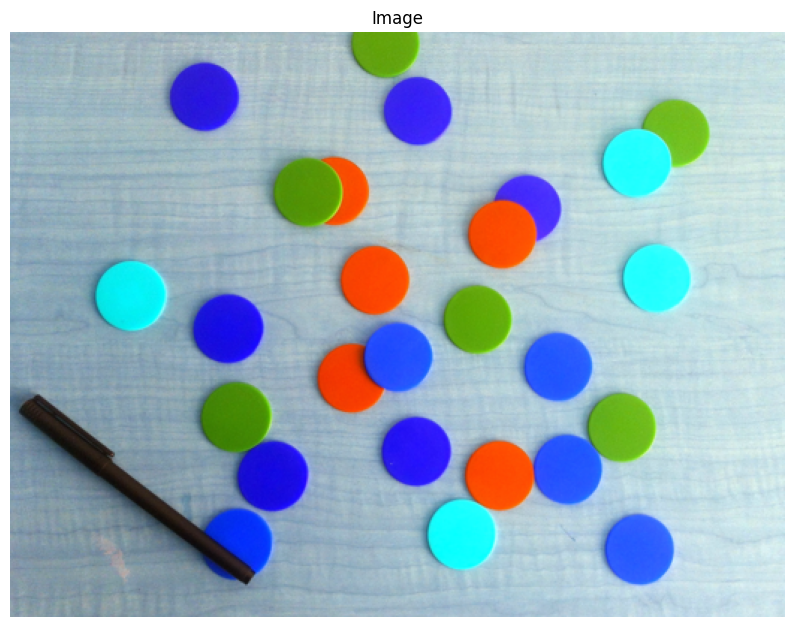

In [5]:
# Display image using matplotlib
plt.figure(figsize=[10,10])
plt.imshow(img)
plt.title("Image")
plt.axis("off")

**Resize image**

In [7]:
img_new = cv2.resize(img, (200, 200))

(-0.5, 199.5, 199.5, -0.5)

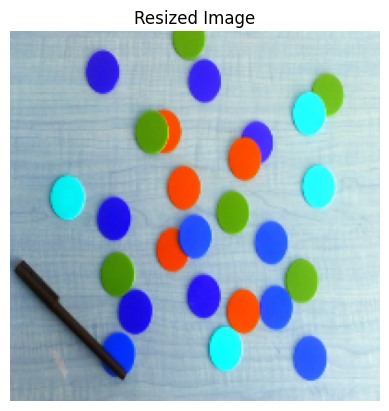

In [9]:
plt.figure(1)
plt.imshow(img_new)
plt.title("Resized Image")
plt.axis("off")

In [10]:
cv2.imshow("Image", img)
cv2.imshow("NewImage", img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Read image in grayscale**

In [11]:
img1 = cv2.imread(path +"\\coloredChips.png", 0)  # 0 means in grayscale

In [12]:
cv2.imshow("Image1", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Flip the image**

In [13]:
img = cv2.imread(path+"\\football.jpg")
cv2.imshow("fliped image", cv2.flip(img, 1))  # it take parameters 0,-1,1
cv2.waitKey(0)
cv2.destroyAllWindows()

**Convert image to grayscale and save in current directory**

In [16]:
import os 

img2 = cv2.imread(path+"\\football.jpg", 0)  # 0 means in grayscale
cv2.imshow("Image2", img2)

k = cv2.waitKey()  # waits untill key press or wait for particular miliseocds time
if k == ord('s'):
    os.chdir("C:/Users/hp/Google Drive/Fiverr Work/2022/33. Computer Vision Course/pictures")
    cv2.imwrite('output.png', img2)
    cv2.destroyAllWindows()
else:
    cv2.destroyAllWindows()

In [15]:
cv2.destroyAllWindows()